In [1]:
import json
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from scipy import stats

In [30]:
data_scaling_alphas = []
data_scaling_Ds = []
data_scaling_losses = []
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-1/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-1/{i}/info.json", 'r') as f:
            info = json.load(f)
            data_scaling_losses.append(min(info['losses']))
            data_scaling_Ds.append(info['D'])
    except Exception as e:
        print(e)

assert all([x == data_scaling_alphas[0] for x in data_scaling_alphas])
data_scaling_alpha = data_scaling_alphas[0]


  0%|          | 0/30 [00:00<?, ?it/s]

'losses'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/24/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/25/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/26/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/27/info.json'
'losses'


In [31]:
data_scaling_Ds, data_scaling_losses = zip(*sorted(list(zip(data_scaling_Ds, data_scaling_losses)), key=lambda x: x[0]))


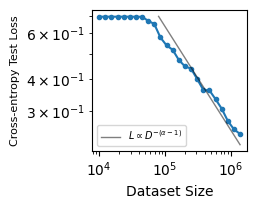

In [47]:
plt.figure(figsize=(2, 1.83333333))
ax = plt.subplot(1, 1, 1)

plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)

xs = np.linspace(8e4, data_scaling_Ds[-1], 10)
ys = np.power(xs, -(data_scaling_alpha - 1))
ys /= 1.1*ys[-1] / data_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-(\alpha - 1)}$")

plt.yscale('log')
plt.xscale('log')

plt.ylabel("Cross-entropy Test Loss", fontsize=8)
plt.xlabel("Dataset Size")
plt.legend(prop={'size': 7})

In [59]:
parameter_scaling_alphas = []
parameter_scaling_Ps = []
parameter_scaling_losses = []
parameter_scaling_loss_curves = dict()
parameter_scaling_log_steps = dict()
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
            parameter_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/info.json", 'r') as f:
            info = json.load(f)
            parameter_scaling_Ps.append(info['P'])
            parameter_scaling_losses.append(info['losses'][-1])
            parameter_scaling_loss_curves[info['P']] = info['losses']
            parameter_scaling_log_steps[info['P']] = info['log_steps']
    except:
        pass

assert all([x == parameter_scaling_alphas[0] for x in parameter_scaling_alphas])
parameter_scaling_alpha = parameter_scaling_alphas[0]

  0%|          | 0/30 [00:00<?, ?it/s]

In [60]:
parameter_scaling_Ps, parameter_scaling_losses = zip(*sorted(list(zip(parameter_scaling_Ps, parameter_scaling_losses)), key=lambda x: x[0]))


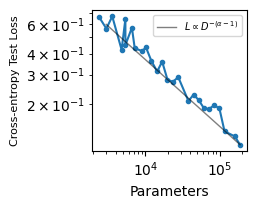

In [61]:
plt.figure(figsize=(2, 1.83333333))
ax = plt.subplot(1, 1, 1)

plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)

xs = np.linspace(3e3, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 1.0*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-(\alpha - 1)}$")

plt.yscale('log')
plt.xscale('log')

plt.ylabel("Cross-entropy Test Loss", fontsize=8)
plt.xlabel("Parameters")
plt.legend(prop={'size': 7})

Text(0.5, 0, 'Compute')

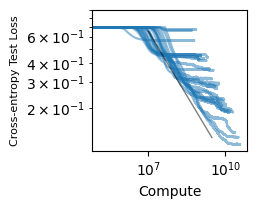

In [85]:
plt.figure(figsize=(2, 1.83333333))
ax = plt.subplot(1, 1, 1)

for i in range(len(parameter_scaling_Ps)):
    P = parameter_scaling_Ps[i]
    computes = np.array(parameter_scaling_log_steps[P]) * P
    plt.plot(computes, parameter_scaling_loss_curves[P], color='C0', alpha=0.5)

alpha = parameter_scaling_alpha
xs = np.linspace(1e7, 3e9, 10)
ys = np.power(xs, -(alpha - 1) / alpha)
ys *= 65
# ys /= 1.0*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-(\alpha - 1)}$")

plt.xscale('log')
plt.yscale('log')
plt.ylabel("Cross-entropy Test Loss", fontsize=8)
plt.xlabel("Compute")

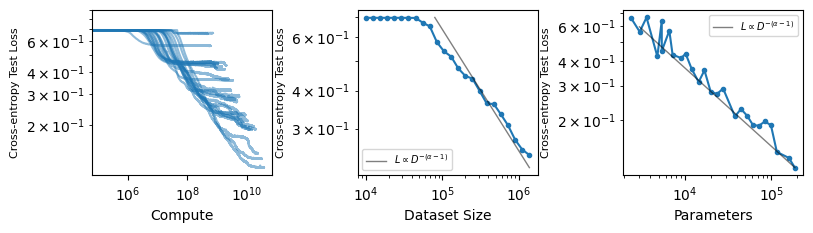

In [89]:
plt.figure(figsize=(8, 2.2))


ax = plt.subplot(1, 3, 1)
for i in range(len(parameter_scaling_Ps)):
    P = parameter_scaling_Ps[i]
    computes = np.array(parameter_scaling_log_steps[P]) * P
    plt.plot(computes, parameter_scaling_loss_curves[P], color='C0', alpha=0.5)
# xs = np.linspace(1e7, 1e9, 10)
# ys = np.power(xs, -(parameter_scaling_alpha - 1))
# ys *= 500
# # ys /= 1.0*ys[-1] / parameter_scaling_losses[-1]
# plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-(\alpha - 1)}$")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Cross-entropy Test Loss", fontsize=8)
plt.xlabel("Compute")


ax = plt.subplot(1, 3, 2)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)
xs = np.linspace(8e4, data_scaling_Ds[-1], 10)
ys = np.power(xs, -(data_scaling_alpha - 1))
ys /= 1.1*ys[-1] / data_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-(\alpha - 1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss", fontsize=8)
plt.xlabel("Dataset Size")
plt.legend(prop={'size': 7})
plt.yticks([])

ax = plt.subplot(1, 3, 3)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)
xs = np.linspace(3e3, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 1.0*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-(\alpha - 1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss", fontsize=8)
plt.xlabel("Parameters")
plt.legend(prop={'size': 7})

plt.tight_layout(pad=0.25)
plt.savefig("../figures/compute-data-parameters-large.pdf")